In [5]:
import csv
import random
import matplotlib.pyplot as plt

# Baca data dari file CSV
def baca_data(file):
    data = []
    with open(file, 'r') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)  # Skip header
        for row in reader:
            data.append([float(row[0]), float(row[1]), int(row[2])])
    return data

# Inisialisasi populasi acak
def inisialisasi_populasi(jumlah_populasi):
    populasi = []
    for _ in range(jumlah_populasi):
        populasi.append([random.uniform(-10, 10), random.uniform(-10, 10)])
    return populasi

# Evaluasi kecocokan individu dalam populasi
def evaluasi_populasi(populasi, data):
    fitness = []
    for individu in populasi:
        benar = 0
        for titik in data:
            x, y, label = titik
            if (x * individu[0] + y * individu[1] >= 0 and label == 1) or \
                    (x * individu[0] + y * individu[1] < 0 and label == 0):
                benar += 1
        fitness.append(benar)
    return fitness

# Seleksi orangtua menggunakan turnamen
def seleksi(populasi, fitness, jumlah_orangtua):
    orangtua = []
    for _ in range(jumlah_orangtua):
        kandidat = random.choices(range(len(populasi)), k=3)
        max_fitness = max([fitness[i] for i in kandidat])
        orangtua.append(populasi[fitness.index(max_fitness)])
    return orangtua

# Melakukan crossover dua orangtua untuk menghasilkan anak
def crossover(orangtua1, orangtua2):
    anak = [0, 0]
    for i in range(2):
        if random.random() < 0.5:
            anak[i] = orangtua1[i]
        else:
            anak[i] = orangtua2[i]
    return anak

# Melakukan mutasi pada individu anak
def mutasi(individu, prob_mutasi):
    for i in range(2):
        if random.random() < prob_mutasi:
            individu[i] += random.uniform(-0.1, 0.1)
    return individu

# Algoritma genetika
def algoritma_genetika(data, jumlah_generasi, jumlah_populasi, prob_mutasi):
    populasi = inisialisasi_populasi(jumlah_populasi)
    for _ in range(jumlah_generasi):
        fitness = evaluasi_populasi(populasi, data)
        orangtua = seleksi(populasi, fitness, jumlah_populasi // 2)
        populasi_baru = []
        for i in range(jumlah_populasi // 2):
            anak = crossover(orangtua[i], orangtua[len(orangtua) - i - 1])
            anak = mutasi(anak, prob_mutasi)
            populasi_baru.extend([anak, anak])
        populasi = populasi_baru
    fitness = evaluasi_populasi(populasi, data)
    individu_terbaik = populasi[fitness.index(max(fitness))]
    return individu_terbaik

# Fungsi untuk memisahkan data berdasarkan garis model
def pisahkan_data(data, individu):
    data_1 = []
    data_0 = []
    for titik in data:
        x, y, label = titik
        if x * individu[0] + y * individu[1] >= 0:
            data_1.append(titik)
        else:
            data_0.append(titik)
    return data_1, data_0

# Fungsi untuk memplot data dan garis model
def plot_data(data_1, data_0, individu):
    plt.scatter([titik[0] for titik in data_1], [titik[1] for titik in data_1], c='blue', label='1')
    plt.scatter([titik[0] for titik in data_0], [titik[1] for titik in data_0], c='red', label='0')
    plt.plot([-10, 10], [(-10 * individu[0] / individu[1]), (10 * individu[0] / individu[1])], color='green', linewidth=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

 


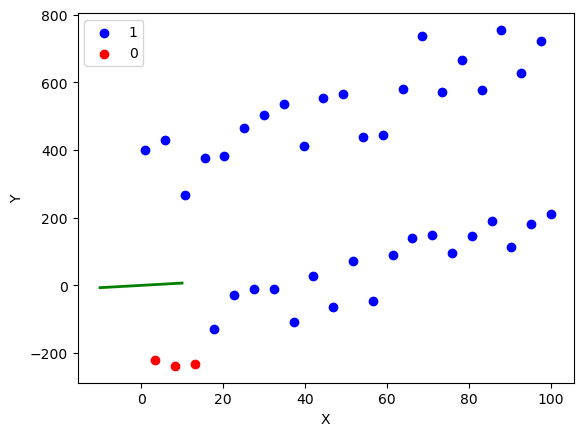

In [10]:
file_csv = 'DataClassification.csv'
data = baca_data(file_csv)
individu_terbaik = algoritma_genetika(data, jumlah_generasi=1000, jumlah_populasi=50, prob_mutasi=0.1)
#data_1, data_0 = pisahkan_data(data, individu_terbaik)
plot_data(data_1, data_0, individu_terbaik)